In [ ]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/AI

/content/drive/MyDrive/AI


In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=5e230c7fde3c66e8999ab91b603d71c20d3ab6b80da3ec7befc9abb425c2886f
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
import wget
wget.download(link)

'traffic-signs-data.zip'

In [ ]:
data = "./"
!unzip -q traffic-signs-data.zip -d $data

In [ ]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [ ]:
import pickle

In [ ]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [ ]:
trainX = train["features"]
trainX.shape

(34799, 32, 32, 3)

In [ ]:
trainY = train["labels"]
trainY.shape

(34799,)

In [ ]:
validX = valid["features"]
validY = valid["labels"]
testX = test["features"]
testY = test["labels"]

In [ ]:
import matplotlib.pyplot as plt

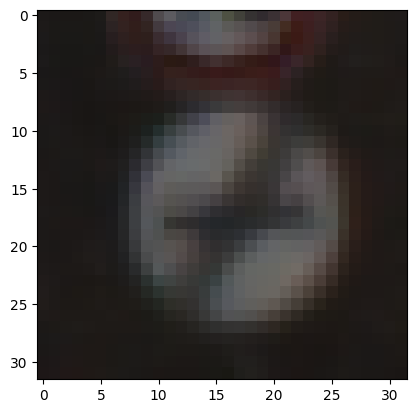

In [ ]:
plt.imshow(trainX[0])

Danh sách nhãn

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [ ]:
from sklearn.utils import shuffle

In [ ]:
trainX, trainY = shuffle(trainX, trainY)

In [ ]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer #one-hot
lb = LabelBinarizer()

In [ ]:
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling1D, BatchNormalization, Activation, Input, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
width = 32
height = 32
classes = 43

In [ ]:
shape = (width, height, 3)

VGG16

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),padding = 'same', input_shape = shape))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2,2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(64,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(classes))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        22,059 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 43)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188,107 (8.35 MB)

 Trainable params: 2,186,699 (8.34 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True) #Tăng cường DL

In [ ]:
learning_rate = 0.01
epochs = 10
batch_size = 64

In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Start training...")
H = model.fit(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch = trainX.shape[0] // batch_size, epochs=epochs, verbose=1)

Start training...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


543/543 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.2747 - loss: 2.7505 - val_accuracy: 0.5134 - val_loss: 1.6732
Epoch 2/10
  1/543 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.6562 - loss: 0.9498

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6562 - loss: 0.9498 - val_accuracy: 0.5048 - val_loss: 1.6793
Epoch 3/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 36s 66ms/step - accuracy: 0.7186 - loss: 0.8666 - val_accuracy: 0.6077 - val_loss: 1.3937
Epoch 4/10
  1/543 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8438 - loss: 0.4252

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.4252 - val_accuracy: 0.6279 - val_loss: 1.2947
Epoch 5/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.8700 - loss: 0.3979 - val_accuracy: 0.7744 - val_loss: 0.7969
Epoch 6/10
  1/543 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9062 - loss: 0.1973

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.9062 - loss: 0.1973 - val_accuracy: 0.7694 - val_loss: 0.7973
Epoch 7/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9308 - loss: 0.2131 - val_accuracy: 0.7966 - val_loss: 0.7052
Epoch 8/10
  1/543 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9375 - loss: 0.1421

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.1421 - val_accuracy: 0.7937 - val_loss: 0.7215
Epoch 9/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.9530 - loss: 0.1474 - val_accuracy: 0.8415 - val_loss: 0.5662
Epoch 10/10
  1/543 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9844 - loss: 0.0724

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.9844 - loss: 0.0724 - val_accuracy: 0.8472 - val_loss: 0.5484


In [ ]:
model.save("traffic_sign_vgg16.h5")

In [ ]:
saved_model = tf.keras.models.load_model("traffic_sign_vgg16.h5")

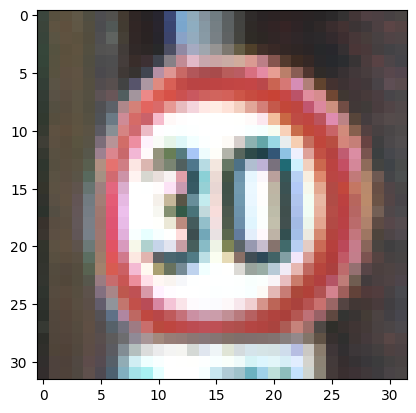

In [ ]:
plt.imshow(testX[1])

In [ ]:
rs = saved_model.predict(testX[1:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
rs

array([[7.6159308e-06, 9.9947804e-01, 9.5405824e-08, 6.5914535e-10,
        1.4195097e-08, 3.9327706e-04, 3.3235953e-10, 3.2367923e-06,
        1.8564313e-07, 7.7526395e-11, 1.2110588e-14, 1.5225332e-09,
        3.2112015e-12, 8.4343834e-12, 6.8797493e-14, 2.1049483e-13,
        4.1376111e-08, 2.6654021e-11, 1.5195153e-10, 2.9195972e-08,
        2.6929931e-10, 2.4020659e-09, 3.6495031e-14, 2.0878987e-07,
        7.9229139e-09, 1.6660623e-10, 8.9012063e-14, 1.6532255e-11,
        7.4003096e-05, 8.4193035e-09, 2.7005928e-08, 3.4786449e-09,
        5.5667412e-13, 3.0334178e-08, 2.5736743e-10, 2.8110142e-07,
        6.9691964e-08, 4.2279571e-05, 4.9250257e-09, 1.7107621e-10,
        5.2139734e-07, 7.8944082e-12, 2.2087954e-10]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
final = np.argmax(rs)
final = classNames[final]
final

'Speed limit (30km/h)'